In [21]:
import pandas as pd
import numpy as np

In [22]:
players = pd.read_csv("./data/players_22.csv")

C:\Users\tmakh\AppData\Local\Temp\ipykernel_2036\440233925.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("./data/players_22.csv")


In [23]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [24]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [25]:
players = players.dropna(subset=features)
# drop any rows where one of these cols has a null or missing value

In [26]:
data = players[features].copy()

In [27]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


### Scale the data

In [28]:
# 1. scale the data
# 3. Initialize random centroids
# 3. label each data point 
# 4. update centroids
# 5. repeat steps 3 and 4 until centroids stop changing

In [29]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1
# sets the min value of each column to 0
# then rescale everything from 0 to 1
# then multiply by 9 
# then + 1
# so everything goes from 1 to 10 scale

In [30]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [31]:
#everything now is a 1 to 10 scale 

In [32]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [33]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x:float(x.sample()))
        centroids.append(centroid)
        # the apply method iterate through each column in the data
        # in each column we call x.sample
        # x.sample selects a single value from that col 
        # then we return that value as a float

    return pd.concat(centroids, axis=1)
    # combines each centroid

In [34]:
centroids = random_centroids(data, 5)
# this  centroida are a pandas series, each one has a random value from our data for each column

C:\Users\tmakh\AppData\Local\Temp\ipykernel_2036\1615252813.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x:float(x.sample()))


In [35]:
centroids

,0,1,2,3,4
overall,3.543478,1.782609,3.934783,5.108696,3.934783
potential,7.456522,5.695652,5.108696,4.717391,8.630435
wage_eur,1.090129,1.038627,1.141631,4.334764,1.012876
value_eur,1.004686,1.028579,1.033218,1.006542,1.064534
age,1.666667,3.333333,3.000000,2.000000,1.666667


In [36]:
#the first to steps are done

In [37]:
# third step:
# 3.Label each data point

In [38]:
# look at each player in the data and find the distance between the data point and the each centroid
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    # from each row we subtract the value of the centroid
    # the overall - the overallof the centroid 0, the potential - the potential of the centroid 0 ...
    # then we square thoese each difference, then we sum it all
    # x : centroids.iloc[:,0]

    return distances.idxmin(axis=1)
    # figure out automatically which cluster each player is in

In [39]:
labels = get_labels(data, centroids)

In [40]:
labels

0        3
1        3
2        3
3        3
4        3
        ..
19234    1
19235    1
19236    1
19237    1
19238    1
Length: 19165, dtype: int64

In [41]:
labels.value_counts()
# value_counts, will count the number of players in each cluster

2    15802
0     1357
1     1096
4      616
3      294
Name: count, dtype: int64

In [42]:
# 4. Update each data point
# find the geometric mean
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    # the log of each data pt, then find the mean of these values in the row, then do the exponential
    # then we apply this for each of our data
    # data.groupby(labels) here we create one group for each cluster
    # then for each grp we apply this geometric mean
    # the result will be the calculation of new centroids for each column
    # .T to switch the cols and rows

In [43]:
# 5. repeat step 3 and 4 until centroids stop changing


In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

# to visualise our data
# we have 5 features for each play
# we need to turn the 5 dimensional data into 2 dimensional data through the PCA

In [45]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2) # we want to have 2 cols returned by our pca
    data_2d = pca.fit_transform(data) # runs the model on our data, fit our data then trnsform it into 2 dimensional data
    centroids_2d = pca.transform(centroids.T) # .T cz the pca wait a data in the form the cols are the features and the rows are the data pt
    clear_output(wait=True)
    plt.title(f"Iteration {iteration}")
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    # we plot each data pt into a graph, which cluster every data point is part of
    plt.show()

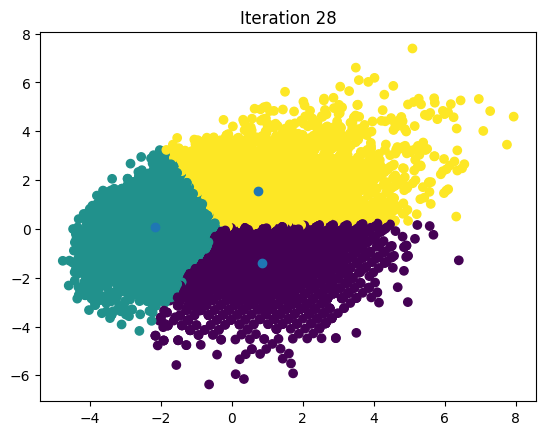

In [46]:
max_iterations = 100 # the total number of times the algorithm will iterate, unless the clusters stoppes changing
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame() # we will stop the algorithm when our old centroids are equal to our centroids
# that means the centroids have stopped shfiting
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
    

In [47]:
centroids

,0,1,2
overall,4.784633,3.206838,5.806043
potential,4.506962,4.928473,6.497993
wage_eur,1.118904,1.028505,1.420001
value_eur,1.044980,1.026614,1.285501
age,5.472247,2.518708,3.596161


In [48]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


In [49]:
from sklearn.cluster import KMeans


In [50]:
kmeans = KMeans(3) # 3 is the nb of clusters we want
kmeans.fit(data)

KMeans(n_clusters=3)

In [51]:
centroids = kmeans.cluster_centers_

In [52]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,6.219783,4.805105,3.588070
potential,6.620896,4.509983,5.200005
wage_eur,1.652494,1.113645,1.039476
value_eur,1.411591,1.040255,1.035407
age,4.125475,5.605519,2.706593
